In [1]:
import pandas as pd
import numpy as np
NaN = np.nan
from pyobistools.validation.check_fields import check_fields
import plotly.graph_objects as go
pd.set_option('max_colwidth', None)

### Info about this notebook series

This series of notebook is meant to serve as an educational tool to learn how to use the PyObis biodiversity data validation package: + https://github.com/cioos-siooc/pyobistools

Darwin Core documentation: 
+ https://dwc.tdwg.org/

Darwin Core file types required fields: 
+ https://ioos.github.io/bio_mobilization_workshop/01-introduction/index.html
+ https://ioos.github.io/bio_mobilization_workshop/04-create-schema/index.html

### Notebook to test Pyobis' function 'check_fields'

##### Function 'check_fields' description
This function is used with Darwin Core file to report:
+ the absence of required or recommended fields 
+ the presence of empty values in present required or recommended fields 

##### Function 'check_fields' arguments
+ data: Dataframe of the data to evaluate
+ level (default = 'error'): 
    + 'error': Return errors regarding the absence of required fields and empty values in present required fields
    + 'warning': Return warnings regarding the absence of recommended fields and presence of empty values in recommended fields
+ analysis_type: Type of DWC file to analyze 
    + event_core
    + occurrence_extension
    + extended_measurement_or_fact_extension
    + occurrence_core
+ accepted_name_usage_id_check (default = False): Option to check for a given row if there is a value in field 'acceptednameusageid' when for the same row there is no value in field 'scientificnameid'. If the former is positive, the error reporting an empty value for 'scientificnameid' is withdrawn.

##### Relation to obistools package in R:
This is the python equivalent of check_fields()
Warning, check_fields() from {obistools} only check the presence of required and recommended fields along with empty values for those fields. Checks_fields () from {pyobistools} goes further with the analysis_type and accepted_name_usage_id_check argument
See R documentation https://github.com/iobis/obistools#check-required-fields 



Load different types of DWC files:

In [2]:
event_core = pd.read_csv('https://catalogue.ogsl.ca/data/zip-rne/ca-cioos_0925e105-860e-4fe7-83ac-afc5e4c2699e/zip-rne_marais-hick_event.csv')
emof1 = pd.read_csv('https://catalogue.ogsl.ca/data/zip-rne/ca-cioos_0925e105-860e-4fe7-83ac-afc5e4c2699e/zip-rne_marais-hick_event_emof_2022.csv')
occurrence_extension = pd.read_csv('https://catalogue.ogsl.ca/data/mun/ca-cioos_d006cd88-6d08-409a-9c11-2ca63a20ca1b/occurrence_placentia_diadromous-fish.csv')
emof2 = pd.read_csv('https://catalogue.ogsl.ca/data/zip-rne/ca-cioos_0925e105-860e-4fe7-83ac-afc5e4c2699e/zip-rne_marais-hick_occurrence_emof_2022.csv')
occurrence_core = pd.read_csv('https://catalogue.ogsl.ca/data/ncc/ca-cioos_b52bb8be-d225-442c-94ab-6f107a64b8a6/saint_john_river_saltmarshes_species-occurrence_2021.csv')
occurrence_core.head(3)

,datasetID,occurrenceID,eventDate,countryCode,location,decimalLatitude,decimalLongitude,accuracyInMeters,kingdom,commonName,...,taxonID,taxon_id,iNaturalistID,taxonRank,occurrenceStatus,basisOfRecord,user_login,quality_grade,license,url
0,NCC-ST-JOHN-RIVER-SALTMARSHES-2021,NCC-ST-JOHN-RIVER-SALTMARSHES-2021-001,2021-08-11 06:02:26,CA,Randolph Island,45.268169,-66.122442,8,Plantae,reed canary grass,...,https://www.gbif.org/species/5289756,63337,90776330,Species,present,HumanObservation,bethbrooks1030,research,CC-BY-NC,https://www.inaturalist.org/observations/90776330
1,NCC-ST-JOHN-RIVER-SALTMARSHES-2021,NCC-ST-JOHN-RIVER-SALTMARSHES-2021-002,2021-08-11 06:03:12,CA,Randolph Island,45.268148,-66.122424,9,Plantae,prairie cordgrass,...,https://www.gbif.org/species/9592414,772984,90776368,Species,present,HumanObservation,bethbrooks1030,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/90776368
2,NCC-ST-JOHN-RIVER-SALTMARSHES-2021,NCC-ST-JOHN-RIVER-SALTMARSHES-2021-003,2021-08-11 06:04:32,CA,Randolph Island,45.268140,-66.122220,8,Plantae,three-square bulrush,...,https://www.gbif.org/species/2711190,59072,90776406,Species,present,HumanObservation,bethbrooks1030,research,CC-BY-NC,https://www.inaturalist.org/observations/90776406


Try the check_fields function - analysis type:

In [3]:
check_fields(event_core, analysis_type = 'event_core')

,field,level,row,message
5,geodeticdatum,error,NaN,Required field geodeticdatum is missing


In [4]:
check_fields(occurrence_extension,  analysis_type = 'occurrence_extension').head()

,field,level,row,message
5,kingdom,error,NaN,Required field kingdom is missing
6,occurrencestatus,error,NaN,Required field occurrencestatus is missing


In [5]:
check_fields(emof1, analysis_type = 'extended_measurement_or_fact_extension').head()

,field,level,row,message
2,occurrenceid,error,NaN,Required field occurrenceid is missing
4,measurementtypeid,error,NaN,Required field measurementtypeid is missing
6,measurementvalueid,error,NaN,Required field measurementvalueid is missing
7,measurementaccuracy,error,NaN,Required field measurementaccuracy is missing
9,measurementunitid,error,NaN,Required field measurementunitid is missing


Try the check_fields function - level type:

In [6]:
check_fields(occurrence_core, level = 'error', analysis_type = 'occurrence_core').head()

,field,level,row,message
10,geodeticdatum,error,NaN,Required field geodeticdatum is missing
0,scientificnameid,error,11,Empty value for required field scientificnameid
1,scientificnameid,error,45,Empty value for required field scientificnameid
2,scientificnameid,error,111,Empty value for required field scientificnameid
3,scientificnameid,error,176,Empty value for required field scientificnameid


In [7]:
check_fields(occurrence_core, level = 'warning', analysis_type = 'occurrence_core').head()

,field,level,row,message
11,minimumdepthinmeters,warning,NaN,Recommended field minimumdepthinmeters is missing
12,maximumdepthinmeters,warning,NaN,Recommended field maximumdepthinmeters is missing
13,coordinateuncertaintyinmeters,warning,NaN,Recommended field coordinateuncertaintyinmeters is missing
14,samplingprotocol,warning,NaN,Recommended field samplingprotocol is missing
16,organismquantity,warning,NaN,Recommended field organismquantity is missing


In [8]:
occurrence_extension.head(2)

,eventid,occurrenceid,vernacularname,scientificname,scientificnameid,taxonrank,occurencestatus,basisofrecord
0,MUN-EF-1-1-2020-001,MUN-2020-nort-1-001,sticklebacks,Gasterosteidae sp.,urn:lsid:marinespecies.org:taxname:125476,family,presence,LivingSpecimen
1,MUN-EF-1-1-2020-001,MUN-2020-nort-1-002,eels,Anguilla sp.,urn:lsid:marinespecies.org:taxname:125620,genus,presence,LivingSpecimen


Try the check_fields function - accepted_name_usage_id_check:

In [9]:
print(len(check_fields(occurrence_extension,  analysis_type = 'occurrence_extension', accepted_name_usage_id_check = True )))
check_fields(occurrence_extension,  analysis_type = 'occurrence_extension', accepted_name_usage_id_check = True ).head()

2


,field,level,row,message
5,kingdom,error,NaN,Required field kingdom is missing
6,occurrencestatus,error,NaN,Required field occurrencestatus is missing


In [10]:
print(len(check_fields(occurrence_extension,  analysis_type = 'occurrence_extension', accepted_name_usage_id_check = False )))
check_fields(occurrence_extension,  analysis_type = 'occurrence_extension', accepted_name_usage_id_check = False ).head()

2


,field,level,row,message
5,kingdom,error,NaN,Required field kingdom is missing
6,occurrencestatus,error,NaN,Required field occurrencestatus is missing


#### Extras - Latitudes and longitudes exploration

centre lat:  45.27645278
centre lon:  -66.13394166500001
area:  0.0029805482084073256
zoom :  11.681980998922137


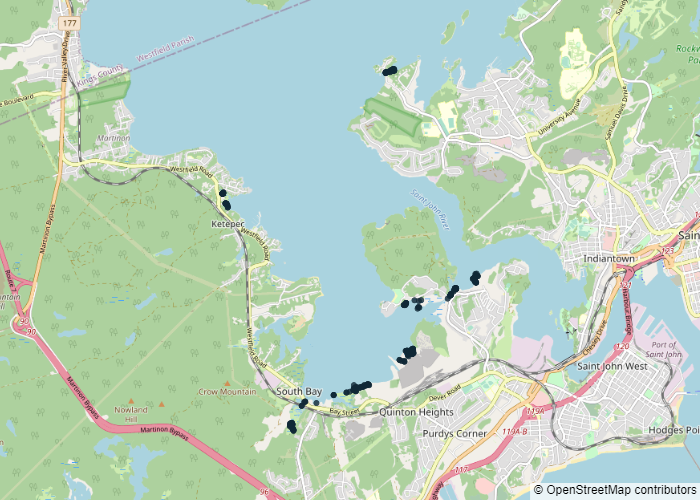

In [12]:
data = occurrence_core
colonne1 = 'decimallatitude'
colonne2 = 'decimallongitude'
colonne3 = 'datasetid'


data1 = data.rename(columns=str.lower)

# finds latitudes values NOT between -90 & 90 degrees and longitudes values NOT between -180 & 180 degrees
latitudes_non_valides = data1.loc[(data1[colonne1].gt(90)) | (data1[colonne1].lt(-90)) ]
longitudes_non_valides = (data1.loc[(data1[colonne2].gt(180)) | (data1[colonne2].lt(-180))]) 
frames = [latitudes_non_valides, longitudes_non_valides]
coordonees_non_valides = pd.concat(frames)

# we get rid of duplicated values
latitude_colonne  =  coordonees_non_valides.columns.get_loc(colonne1)
longitude_colonne =  coordonees_non_valides.columns.get_loc(colonne2)
coordonees_non_valides = coordonees_non_valides.iloc[:,[0,latitude_colonne, longitude_colonne]]
coordonees_non_valides.drop_duplicates(inplace=True)


# finds latitudes values between -90 & 90 degrees and longitudes values between -180 & 180 degrees 
coordonnees_valides = data1[data1[colonne1].between(-90,90) & data1[colonne2].between(-180,180)]


# show map
centre_long =.5*(max(np.asarray(np.float64(coordonnees_valides[colonne2]).tolist())) + min(np.asarray(np.float64(coordonnees_valides[colonne2]).tolist())))
centre_lat = .5*(max(np.asarray(np.float64(coordonnees_valides[colonne1]).tolist())) + min(np.asarray(np.float64(coordonnees_valides[colonne1]).tolist())))
height = max(np.asarray(np.float64(coordonnees_valides[colonne1]).tolist())) - min(np.asarray(np.float64(coordonnees_valides[colonne1]).tolist()))
width = max(np.asarray(np.float64(coordonnees_valides[colonne2]).tolist())) -  min(np.asarray(np.float64(coordonnees_valides[colonne2]).tolist()))
area = height * width


zoom = np.interp(x=area,
                xp=[0.0005,   .02,   .05,  30,  350,   3500],
                fp=[12,        9.5,    6,     4,   2,     1])
print('centre lat: ', centre_lat) 
print('centre lon: ', centre_long) 
print('area: ', area)
print('zoom : ', zoom)

fig = go.Figure(go.Scattermapbox(
    lon = np.asarray(np.float64(coordonnees_valides[colonne2]).tolist()), lat = np.asarray(np.float64(coordonnees_valides[colonne1]).tolist()),
        mode='markers', 
        marker = { 'size': 7, 'color': "rgb(16, 40, 54)", 'opacity': 0.8 },
        text=coordonnees_valides[colonne3]))

fig.update_layout(
            mapbox = {'style': "open-street-map", 
                'center': {'lon': centre_long, 'lat': centre_lat},
                'zoom': zoom
            },
            showlegend = False,
            margin = {'l':0, 'r':0, 'b':0, 't':0}, 
            )

fig.show("png")
